## Kernel Density

When the true shape is good, there is no much difference when using different kernels, even the data is bounded.

  0.087020 seconds (66.10 k allocations: 1.138 MB)
  

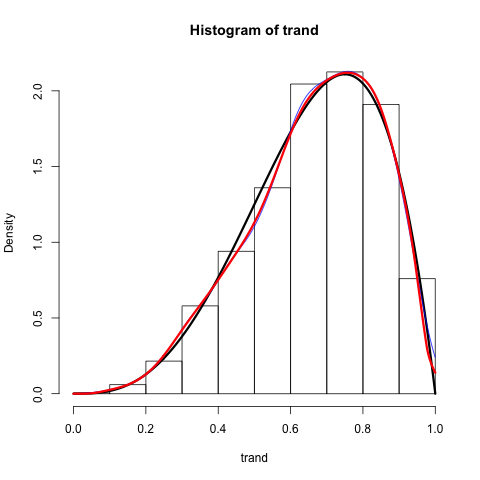

0.155664 seconds (100.94 k allocations: 7.894 MB)
NULL


In [15]:
using KernelEstimator, Distributions, RCall
trand=rand(Beta(4,2),2000);
xs=linspace(0,1,400);
@time den1 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gaussiankernel);
@time den2 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=betakernel, lb=0.0, ub=1.0);
g = globalEnv
g[:trand] = trand
g[:xs] = xs
g[:den1]=den1
g[:den2]=den2

rprint(""" 
hist(trand, probability=T)
lines(x=xs, y=dbeta(xs, 4, 2), lwd=3)
lines(x=xs, y=den1, col="blue", lwd=1)
lines(x=xs, y=den2, col="red", lwd=3)
""")


But in this example, the advantage of using `betakernel` appears.
It is challenging to choose the right bandwidth for `gaussiankernel` in this example. The estimated density tends to be wiggly. And the density can be unpredictable near the boundary. 

  0.488183 seconds (133.19 k allocations: 2.168 MB)
  

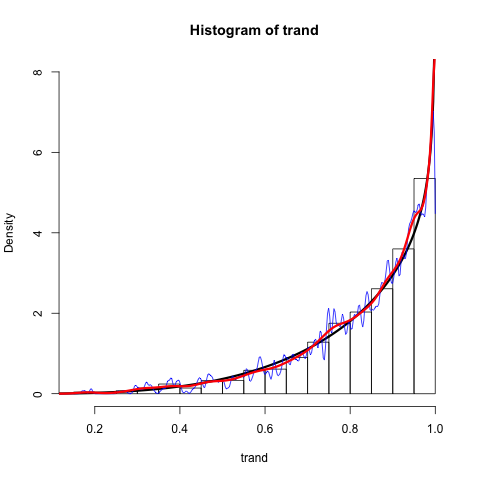

0.279708 seconds (157.75 k allocations: 8.766 MB)
NULL


In [17]:
using KernelEstimator, Distributions, RCall
trand=rand(Beta(4,.8),2000);
xs=linspace(0,1,400);
@time den1 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gaussiankernel);
@time den2 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=betakernel, lb=0.0, ub=1.0);
g = globalEnv
g[:trand] = trand
g[:xs] = xs
g[:den1]=den1
g[:den2]=den2

rprint(""" 
hist(trand, probability=T,ylim=c(0,8))
lines(x=xs, y=dbeta(xs, 4, .8), lwd=3)
lines(x=xs, y=den1, col="blue", lwd=1)
lines(x=xs, y=den2, col="red", lwd=3)
""")


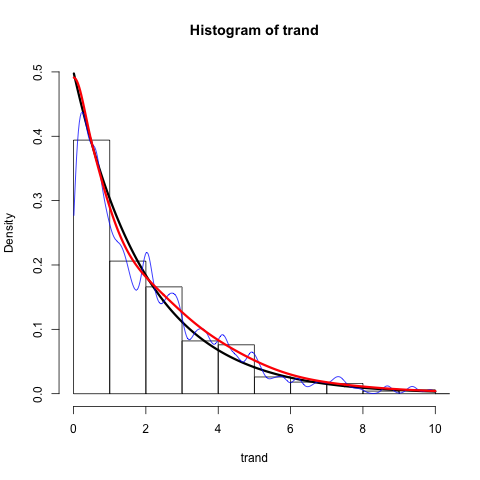

0.039849 seconds (40.65 k allocations: 715.891 KB)
  0.023939 seconds (30.11 k allocations: 563.641 KB, 17.82% gc time)
NULL


In [10]:
using KernelEstimator, Distributions, RCall
trand=rand(Chisq(2), 500)
xs=linspace(0.01,10,400);
@time den1 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gaussiankernel);
@time den2 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gammakernel, lb=0.0);
g = globalEnv
g[:trand] = trand
g[:xs] = xs
g[:den1] = den1
g[:den2]=den2

rprint(""" 
hist(trand, probability=T, ylim=c(0, .5), xlim=c(0, 10), breaks=20)
lines(x=xs, y=dchisq(xs, 2), lwd=3)
lines(x=xs, y=den1, col="blue", lwd=1)
lines(x=xs, y=den2, col="red", lwd=3)
""")


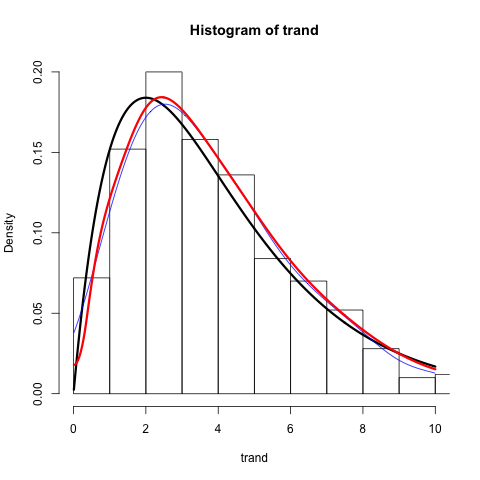

0.007261 seconds (14.48 k allocations: 299.813 KB)
  0.017892 seconds (25.90 k allocations: 496.578 KB)
NULL


In [11]:
using KernelEstimator, Distributions, RCall
trand=rand(Chisq(4), 500)
xs=linspace(0.01,10,400);
@time den1 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gaussiankernel);
@time den2 = KernelEstimator.kerneldensity(trand, xeval= xs, kernel=gammakernel, lb=0.0);
g = globalEnv
g[:trand] = trand
g[:xs] = xs
g[:den1] = den1
g[:den2]=den2

rprint(""" 
hist(trand, probability=T, xlim=c(0, 10), breaks=20, ylim=c(0, .2))
lines(x=xs, y=dchisq(xs, 4), lwd=3)
lines(x=xs, y=den1, col="blue", lwd=1)
lines(x=xs, y=den2, col="red", lwd=3)
""")


## Regression

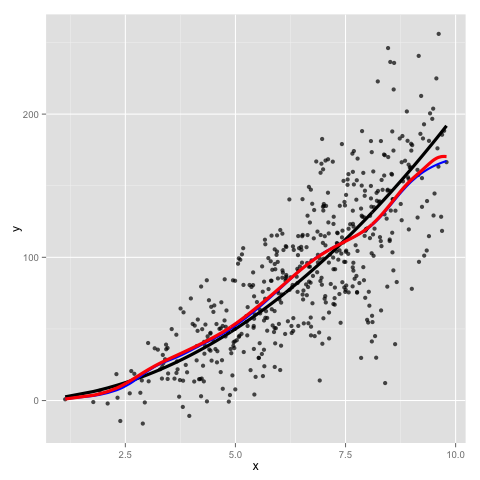

In [20]:
x = rand(Beta(4,2), 500) * 10
y=2 .* x.^2 + x .* rand(Normal(0, 5), 500)
yhat1 = localconstant(x, y)
yhat2= npr(x, y, reg=localconstant, lb=0.0, ub=10.0)
g[:x]=x
g[:y]=y
g[:yhat1]=yhat1
g[:yhat2]=yhat2
rprint("""
library(ggplot2)
ggplot()+geom_point(aes(x=x, y=y), alpha=.7) + 
geom_line(aes(x=x, y=2 * x^2), size=1.5)+
geom_line(aes(x=x, y=yhat1), color="blue", size=1)+
geom_line(aes(x=x, y=yhat2), color="red", size=1.5)
""")

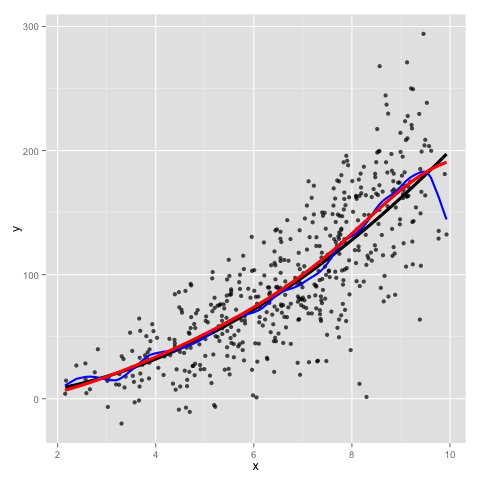

In [23]:
x = rand(Beta(4,2), 500) * 10
y=2 .* x.^2 + x .* rand(Normal(0, 5), 500)
yhat1 = locallinear(x, y)
yhat2= npr(x, y, reg=locallinear, lb=0.0, ub=10.0)
g[:x]=x
g[:y]=y
g[:yhat1]=yhat1
g[:yhat2]=yhat2
rprint("""
library(ggplot2)
ggplot()+geom_point(aes(x=x, y=y), alpha=.7) + 
geom_line(aes(x=x, y=2 * x^2), size=1.5)+
geom_line(aes(x=x, y=yhat1), color="blue", size=1)+
geom_line(aes(x=x, y=yhat2), color="red", size=1.5)
""")

## Confidence Band

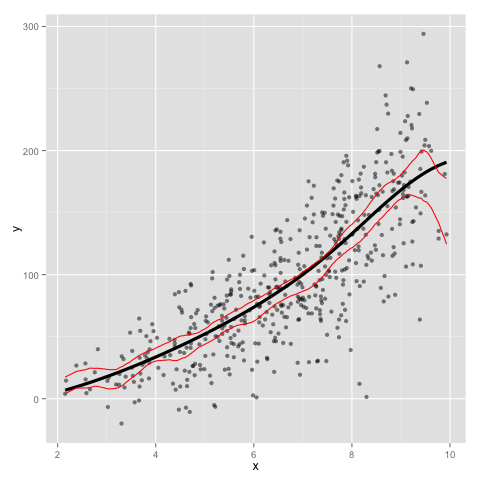

In [26]:
cb=bootstrapCB(x, y)
yhat2= npr(x, y, reg=locallinear, lb=0.0, ub=10.0)
lb = cb[1,:][:]
ub=cb[2,:][:]
g[:x]=x
g[:y]=y
g[:yhat2]=yhat2
g[:lb]=lb
g[:ub]=ub
rprint("""
ggplot()+geom_point(aes(x=x, y=y), alpha=.5) +
geom_line(aes(x=x, y=yhat2), size=1.5)+
geom_line(aes(x=x, y=lb), color="red")+
geom_line(aes(x=x, y=ub), color="red")
""")